In [1]:
from src.preprocessing_modules import *
from src.dno_modules2 import *
import umap
import pymde
import torch

In [2]:
# Set the random seed
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()

In [3]:
%load_ext autoreload
%autoreload 2

# pyMDE vs UMAP implementation using GSE128639

In [4]:
data_directory = 'Sample Datasets/GSE128639'
metadata, pro, rna, cite_data = load_data(data_directory)

Reading Data in Sample Datasets/GSE128639/

Found meta, protein, rna data!


In [6]:
#### CITE-seq with Deep-N-Omics ####
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSE128639_test','gene_pro', epochs=20, override = True)

Epoch 1/20
959/959 [==============================] - 31s 28ms/step - loss: 1.5681 - gene_decoder_last_loss: 0.7148 - protein_decoder_last_loss: 0.8534 - val_loss: 1.3513 - val_gene_decoder_last_loss: 0.6774 - val_protein_decoder_last_loss: 0.6739
Epoch 2/20
959/959 [==============================] - 25s 26ms/step - loss: 1.3241 - gene_decoder_last_loss: 0.6762 - protein_decoder_last_loss: 0.6479 - val_loss: 1.2842 - val_gene_decoder_last_loss: 0.6708 - val_protein_decoder_last_loss: 0.6134
Epoch 3/20
959/959 [==============================] - 26s 27ms/step - loss: 1.2867 - gene_decoder_last_loss: 0.6712 - protein_decoder_last_loss: 0.6155 - val_loss: 1.2650 - val_gene_decoder_last_loss: 0.6673 - val_protein_decoder_last_loss: 0.5977
Epoch 4/20
959/959 [==============================] - 26s 27ms/step - loss: 1.2729 - gene_decoder_last_loss: 0.6679 - protein_decoder_last_loss: 0.6049 - val_loss: 1.2557 - val_gene_decoder_last_loss: 0.6644 - val_protein_decoder_last_loss: 0.5913
Epoch 5/

INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged\assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged\assets


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

gene_protein 0.8860850286906625
gene_protein_mde 0.8778038601982264


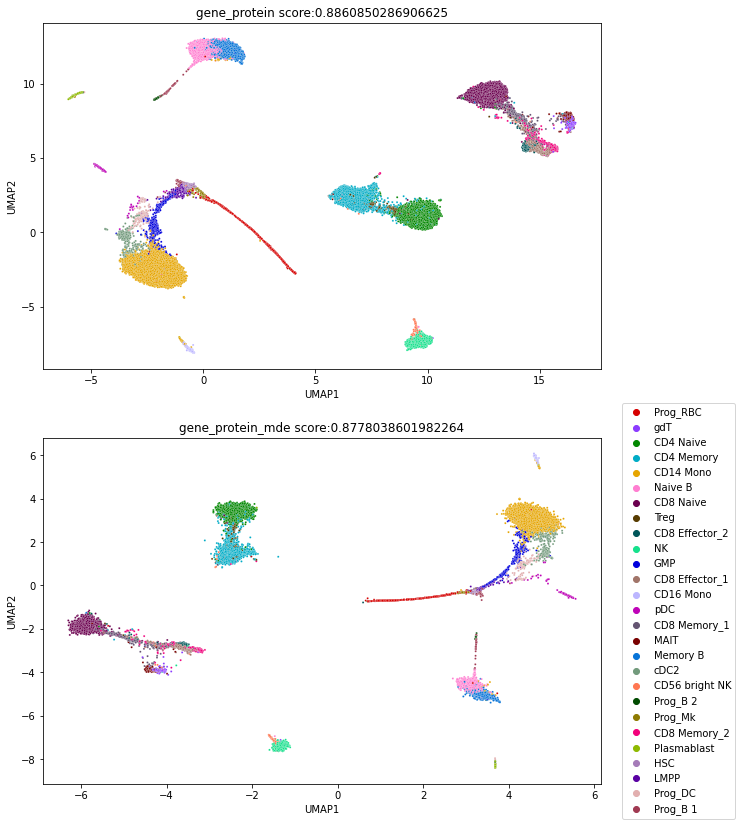

In [8]:
GPbottleneck = bottleneck

#################
# Perform pyMDE #
#################
import pymde
# [rna, pro] and GPbottleneck taken from the previous section
predicted = GPbottleneck.predict([rna, pro])
mde_predicted = pymde.preserve_neighbors(torch.Tensor(predicted), verbose=False).embed()
# metadata taken from the previous section
mde_df = get_plot(mde_predicted, metadata)
score = get_score(mde_predicted, metadata, referenceCol = "celltype.l2", log_max_iter = 400)
# GPbottleneck taken from the previous section
GSE128639_GP_mde = IndivData(GPbottleneck, mde_predicted, mde_df, score)


####################################################
# Performing the usual way of reducing to 2D, UMAP #
####################################################
GSE128639_obj = Rdata()
GSE128639_GP = makeObj([rna, pro], GPbottleneck, metadata,"celltype.l2")

##########################################
# Attaching the attributes to the object #
##########################################
GSE128639_obj.gene_protein = GSE128639_GP
GSE128639_obj.gene_protein_mde = GSE128639_GP_mde

# Plot all attributes
plotObjs(GSE128639_obj, metadata, "celltype.l2")